In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Import librairies**

In [ ]:
import pandas as pd
import numpy as np
from numpy import expand_dims, zeros, ones
from numpy.random import randn, randint
import matplotlib.pyplot as plt
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras
import random as rand
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential, model_from_json, load_model, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, LeakyReLU, Embedding, Concatenate, Reshape, Conv2DTranspose
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
from keras import regularizers
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, KFold
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import tensorflow.compat.v1 as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### **Import data**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/DataSetTrain.csv")
patient_id = df['Patient_id']
df.drop(['Patient_id'], axis=1, inplace=True)
df

dfTest = pd.read_csv("/content/drive/My Drive/DataSetTest.csv")
dfTest.drop(['Patient_id'], axis=1, inplace=True)

label_encoder = preprocessing.LabelEncoder() 
df['Cinical_Status']= label_encoder.fit_transform(df['Cinical_Status'])
dfTest['Cinical_Status']= label_encoder.fit_transform(dfTest['Cinical_Status'])

Y = df['Cinical_Status']
X = df.drop(['Cinical_Status'], 1)
YTest = dfTest['Cinical_Status']
XTest = dfTest.drop(['Cinical_Status'], 1)

df

,ALX1|8092,AP1M1|8907,APOL1|8542,C11orf73|51501,C13orf16|121793,C5orf62|85027,C9orf71|169693,CACNG6|59285,CNTD1|124817,COL7A1|1294,DNASE1L3|1776,EIF4EBP1|1978,EIF5B|9669,EPB49|2039,EYA1|2138,FGFR3|2261,FOXA1|3169,GHRH|2691,GNG7|2788,GPX3|2878,GREB1L|80000,GSTO2|119391,GUCY2D|3000,GYS2|2998,HBG1|3047,HDGFL1|154150,HPS5|11234,HUS1B|135458,IER2|9592,IGSF9|57549,IRF7|3665,KCNAB1|7881,KIAA0652|9776,KIAA1324L|222223,KIAA1737|85457,MAPK7|5598,MPZL2|10205,MYOZ3|91977,NCRNA00051|619434,NKX2-2|4821,NOD2|64127,NOP2|4839,NTM|50863,OASL|8638,P704P|641455,PAR4|347745,RORC|6097,RPL19P12|100129424,RPS11|6205,RSPO2|340419,RTP3|83597,SCARNA20|677681,SHOX2|6474,SLC22A16|85413,SLC35E3|55508,SUMO4|387082,TBX18|9096,TMC3|342125,TOB1|10140,TTF2|8458,UFSP2|55325,UGT2B10|7365,Cinical_Status
0,0.020450,16.050741,20.250155,17.390789,0.000000,80.202931,7.620944,0.015443,1.523850,0.023552,2.031457,82.428384,27.445513,40.496049,0.076362,6.356163,0.017889,0.000000,2.210471,1361.300233,0.008600,28.025871,0.022242,0.116353,0.000000,0.0,5.967228,0.026310,14.350211,0.033742,5.563131,2.338280,12.465655,0.638052,4.413535,4.277724,20.805618,0.095959,0.012928,0.000000,0.846058,19.694835,3.478960,1.211164,0.139206,0.000000,18.448917,0.559398,2039.366785,0.000000,0.165201,0.311468,0.085397,0.020419,8.424814,0.115359,0.040669,0.016345,43.720593,2.706128,27.193570,1.785909,0
1,0.027139,24.644743,125.768968,9.437749,0.105459,24.628329,14.568437,0.000000,1.582340,0.064466,1.802000,28.702425,33.467746,28.261732,0.423656,4.920563,0.000000,0.000000,2.589289,561.584061,1.422748,1.345486,0.004919,0.133442,0.000000,0.0,6.173053,0.046554,56.637725,0.092544,10.606170,2.460992,17.566091,0.372296,4.288718,5.014239,40.961687,0.269387,0.000000,0.028540,2.387059,16.717665,10.439276,2.174627,0.074075,0.000000,7.735120,0.394881,1006.524900,0.002173,0.000000,0.000000,0.003778,0.066240,6.878776,0.102061,0.679141,0.028922,28.477017,2.392543,15.769335,0.914886,0
2,0.042251,13.201337,13.794532,10.290281,0.053043,2.831943,0.738406,0.003191,1.952527,0.419699,1.832676,28.572487,21.454721,25.536172,0.007888,4.994084,0.001848,0.009959,2.639180,1124.605918,0.056855,7.726072,0.052080,0.074789,0.009550,0.0,3.775107,0.016307,13.074751,0.029280,1.863052,0.559930,11.887726,2.895323,18.622784,4.184757,20.055265,0.329412,0.005342,0.162622,0.704712,22.582367,0.225928,0.510283,0.195908,0.023453,11.410504,0.585255,606.419991,0.000000,0.000000,0.128703,0.029994,0.039375,6.076155,0.079446,0.222665,0.015197,49.227418,2.027628,11.562067,0.178129,0
3,0.121223,34.814676,1137.327364,10.192604,0.043482,9.725554,4.760541,0.000000,1.497917,0.073297,0.386690,18.203036,32.613963,23.502311,1.364256,3.103349,0.012371,0.000000,2.494096,1539.330653,0.681381,8.236804,0.156747,0.803817,0.018266,0.0,6.440880,0.062384,18.377086,0.129345,15.463996,1.113387,21.189398,0.160880,2.516772,5.315583,34.015945,0.212944,0.000000,0.005099,4.188586,25.459748,1.306877,5.271233,0.096471,0.004486,4.650781,0.479760,770.571811,0.015533,0.332954,0.041029,0.032060,0.029587,8.220006,0.205146,0.054242,0.033912,38.275725,2.893209,9.071518,2.338354,0
4,0.059291,16.543368,18.741827,7.419870,0.127605,3.483216,8.137301,0.031342,1.423214,0.135719,3.083703,17.562633,20.129361,27.374499,0.016605,9.535484,0.005187,0.000000,3.134568,721.435403,0.099732,0.818863,0.012897,0.232394,0.000000,0.0,3.805035,0.061025,58.102305,0.068481,14.092648,1.026248,12.580249,3.286741,6.347116,4.645611,34.396737,0.449426,0.000000,0.014965,1.104818,12.397982,1.715629,1.771850,0.112308,0.046077,22.403146,0.545228,1110.499484,0.000000,0.000000,0.060203,0.019807,0.039468,6.852718,0.066893,0.241720,0.030803,32.540104,3.296827,19.834033,0.529698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.044295,17.395514,112.873176,13.207193,0.059582,16.040275,9.585558,0.016725,1.8

### **Correlation**

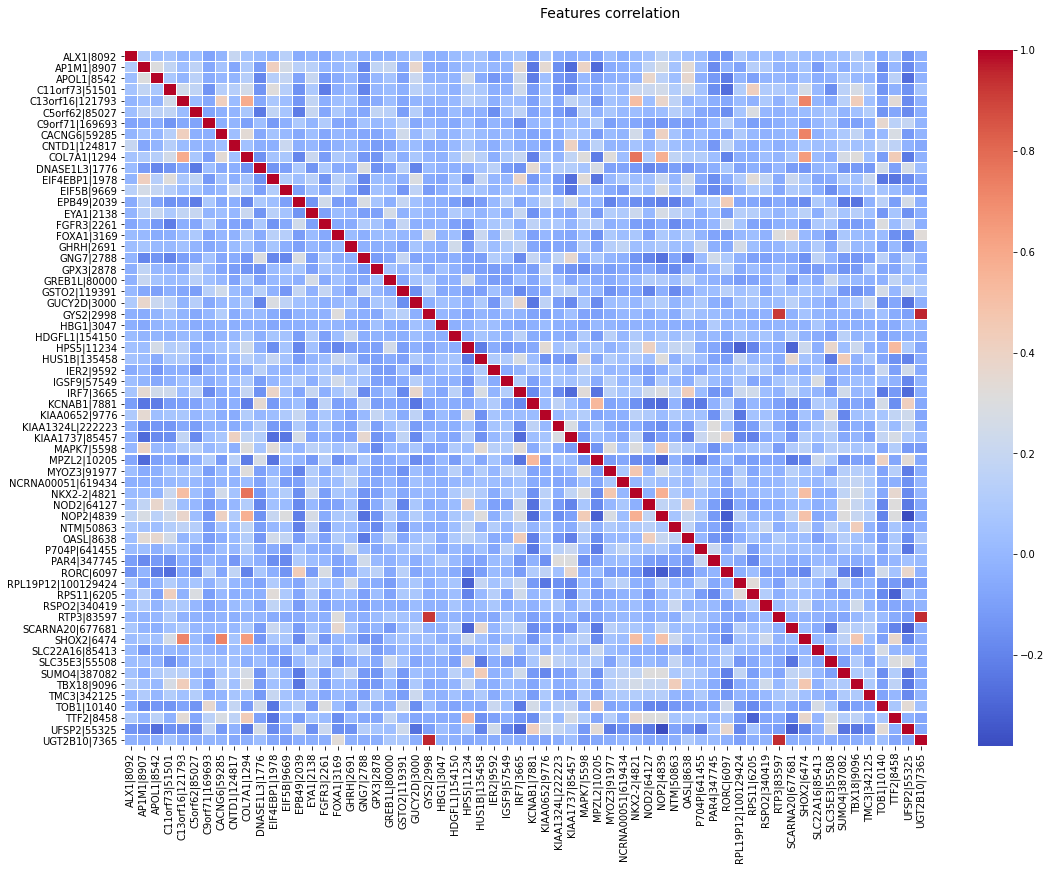

In [ ]:
f, ax = plt.subplots(figsize=(18, 12))
corr = X.corr()
hm = sns.heatmap(round(corr,2), ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features correlation', fontsize=14)

### **Reshape the data**

In [ ]:
X=X.values.reshape(380,31,2,1)
XTest=XTest.values.reshape(95,31,2,1)

### **Models**

### **CNN**

In [ ]:
model_cnn = Sequential()

model_cnn.add(Conv2D(1, kernel_size=(2,2), activation='tanh', input_shape=(31,2,1), data_format = 'channels_last'))
model_cnn.add(Flatten())

model_cnn.add(Dense(30, input_dim=30, kernel_regularizer=regularizers.l2(0.02), activation='tanh'))
model_cnn.add(Dense(15,  kernel_regularizer=regularizers.l2(0.02), activation='tanh'))
model_cnn.add(Dense(8, kernel_regularizer=regularizers.l2(0.02),  activation='tanh'))
model_cnn.add(Dense(4, kernel_regularizer=regularizers.l2(0.02), activation='tanh'))
model_cnn.add(Dense(2, kernel_regularizer=regularizers.l2(0.02),  activation='tanh'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))


model_cnn.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model_cnn.fit(X, Y, batch_size=190, epochs=100)

accuracy = model_cnn.evaluate(XTest, YTest, batch_size=None, verbose=1)
print(accuracy)

In [ ]:
with open('/content/drive/My Drive/model_cnn_80.json', 'r') as f:
  CNN = model_from_json(f.read())
CNN.load_weights('/content/drive/My Drive/CNN_2Conv_80.h5')
CNN.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
CNN_Test = CNN.evaluate(XTest, YTest)
print(CNN_Test)
y_pred = CNN.predict_classes(XTest)

print(classification_report(YTest,y_pred))

CNN.summary()

3/3 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.8000
[0.28004735708236694, 0.800000011920929]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        54
           1       0.82      0.68      0.75        41

    accuracy                           0.80        95
   macro avg       0.81      0.79      0.79        95
weighted avg       0.80      0.80      0.80        95

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 1, 16)         80 

### **ANN**

In [ ]:
model_ann = Sequential()


model_ann.add(Dense(40, input_dim=62, kernel_regularizer=regularizers.l2(0.02), activation='tanh'))
model_ann.add(Dense(20,  kernel_regularizer=regularizers.l2(0.02), activation='tanh'))
model_ann.add(Dense(10, kernel_regularizer=regularizers.l2(0.02),  activation='tanh'))
model_ann.add(Dense(5, kernel_regularizer=regularizers.l2(0.02), activation='tanh'))
model_ann.add(Dense(2, kernel_regularizer=regularizers.l2(0.02),  activation='tanh'))
model_ann.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))

model_ann.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model_ann.fit(X, Y, batch_size=190, epochs=300)

accuracy = model_ann.evaluate(XTest, YTest, batch_size=None, verbose=1)
print(accuracy)

Epoch 1/300
2/2 [==============================] - 0s 2ms/step - loss: 2.2302 - accuracy: 0.5237
Epoch 2/300
2/2 [==============================] - 0s 2ms/step - loss: 2.1884 - accuracy: 0.5421
Epoch 3/300
2/2 [==============================] - 0s 4ms/step - loss: 2.1490 - accuracy: 0.5342
Epoch 4/300
2/2 [==============================] - 0s 4ms/step - loss: 2.1111 - accuracy: 0.5447
Epoch 5/300
2/2 [==============================] - 0s 3ms/step - loss: 2.0735 - accuracy: 0.5579
Epoch 6/300
2/2 [==============================] - 0s 3ms/step - loss: 2.0368 - accuracy: 0.5974
Epoch 7/300
2/2 [==============================] - 0s 3ms/step - loss: 2.0010 - accuracy: 0.5974
Epoch 8/300
2/2 [==============================] - 0s 2ms/step - loss: 1.9659 - accuracy: 0.6053
Epoch 9/300
2/2 [==============================] - 0s 2ms/step - loss: 1.9316 - accuracy: 0.6079
Epoch 10/300
2/2 [==============================] - 0s 2ms/step - loss: 1.8980 - accuracy: 0.6079
Epoch 11/300
2/2 [===========

In [ ]:
model_ann.save_weights('/content/drive/My Drive/ANN.h5')
with open('/content/drive/My Drive/model_architectureANN.json', 'w') as f:
    f.write(model_ann.to_json())

In [ ]:
with open('/content/drive/My Drive/model_architectureANN.json', 'r') as f:
  ANN = model_from_json(f.read())
ANN.load_weights('/content/drive/My Drive/ANN.h5')
ANN.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
ANN_Test = ANN.evaluate(XTest, YTest)
print(ANN_Test)
y_pred = ANN.predict_classes(XTest)

print(classification_report(YTest,y_pred))

ANN.summary()

3/3 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.7368
[0.2899286448955536, 0.7368420958518982]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        54
           1       0.77      0.56      0.65        41

    accuracy                           0.74        95
   macro avg       0.74      0.72      0.72        95
weighted avg       0.74      0.74      0.73        95

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 40)                2520      
_________________________________________________________________
dense_49 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                210       
_______________________________________________________________

### **SVM**

In [ ]:
SVM = pickle.load(open('/content/drive/My Drive/SVM_weighted.sav', 'rb'))
SVM_accuracy = SVM.score(XTest, YTest)
print(SVM_accuracy)

SVM.get_params

0.7368421052631579


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<bound method BaseEstimator.get_params of SVC(C=400, break_ties=False, cache_size=200, class_weight={0: 1, 1: 1.8},
    coef0=0.0, decision_function_shape='ovr', degree=1, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>

### **Naive Bayes**

In [ ]:
NB = pickle.load(open('/content/drive/My Drive/NB.sav', 'rb'))
NB_accuracy = NB.score(XTest, YTest)
print(NB_accuracy)

NB.get_params

0.6947368421052632


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianNB from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>

### **Logistic Regression**

In [ ]:
LR = pickle.load(open('/content/drive/My Drive/LR.sav', 'rb'))
LR_accuracy = LR.score(XTest, YTest)
print(LR_accuracy)

LR.get_params

0.7578947368421053


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=8250,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)>

### **Decision Trees**


In [ ]:
DT = pickle.load(open('/content/drive/My Drive/DT.sav', 'rb'))
DT_accuracy = DT.score(XTest, YTest)
print(DT_accuracy)

DT.get_params

0.7157894736842105


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 2, 1: 1},
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')>

### **Random Forest**

In [ ]:
RF = pickle.load(open('/content/drive/My Drive/RF.sav', 'rb'))
RF_accuracy = RF.score(XTest, YTest)
print(RF_accuracy)

RF.get_params

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


0.7789473684210526


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 2.2}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1400, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)>

### **Comparaison between models**

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'Bayes', 'CNN', 'ANN'],
    'Independent test accuracy'    : [LR_accuracy*100, DT_accuracy*100, SVM_accuracy*100, RF_accuracy*100, NB_accuracy*100, CNN_Test[1]*100, ANN_Test[1]*100],
    }, columns = ['Model', 'Independent test accuracy'])

models_initial.sort_values(by='Independent test accuracy', ascending=False)

,Model,Independent test accuracy
5,CNN,80.000001
3,Random Forest,77.894737
0,Logistic Regression,75.789474
2,Support Vector Machine,73.684211
6,ANN,73.684210
1,Decision Tree,71.578947
4,Bayes,69.473684
